In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df = df.rename(columns={'RegionName': 'zipcode'})

In [5]:
df['zipcode'] = df['zipcode'].astype(str).str.zfill(5)

In [6]:
df['five_year'] = ((df['2018-04']/df['2013-04'])-1)*100

In [7]:
df.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,26.082701
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,53.384175
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,28.315830
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,25.878840
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,7.048458


In [8]:
df[['zipcode','City','State','five_year']].sort_values(by=['five_year'],ascending=False).head(20)

,zipcode,City,State,five_year
7302,80216,Denver,CO,173.872951
1477,94601,Oakland,CA,167.943262
5830,48240,Redford,MI,161.224490
1239,94590,Vallejo,CA,159.379310
2661,33705,Saint Petersburg,FL,159.210526
6105,37210,Nashville,TN,155.932203
2627,33460,Lake Worth,FL,153.647059
6563,15201,Pittsburgh,PA,147.593583
475,11216,New York,NY,147.591761
1835,37207,Nashville,TN,146.683047


In [9]:
lake_worth = df.loc[df['zipcode'] == '37210']

In [10]:
lake_worth.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
6105,74241,37210,Nashville,TN,Nashville,Davidson,6106,60800.0,61000.0,61200.0,...,204600,207700,211100,214500,217200,219300,221500,224300,226500,155.932203


In [11]:
lake_worth = lake_worth.iloc[:,7:-1]

In [12]:
lake_worth.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6105,60800.0,61000.0,61200.0,61300.0,61500.0,61700.0,61900.0,62100.0,62400.0,62700.0,...,201200,204600,207700,211100,214500,217200,219300,221500,224300,226500


In [13]:
lake_worth = lake_worth.T

In [14]:
lake_worth.head()

,6105
1996-04,60800.0
1996-05,61000.0
1996-06,61200.0
1996-07,61300.0
1996-08,61500.0


In [15]:
type(lake_worth)

pandas.core.frame.DataFrame

In [16]:
lake_worth = lake_worth.rename(columns={6105:'home price'})

In [17]:
lake_worth.head()

,home price
1996-04,60800.0
1996-05,61000.0
1996-06,61200.0
1996-07,61300.0
1996-08,61500.0


In [18]:
lake_worth.index = lake_worth.index.astype('datetime64[ns]')

In [19]:
lake_worth.index.dtype

dtype('<M8[ns]')

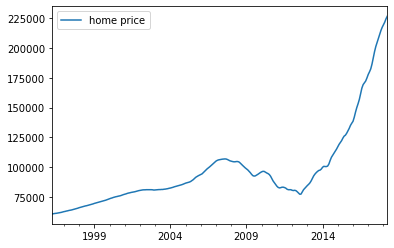

In [20]:
lake_worth.plot();

In [21]:
lake_worth['diff'] = lake_worth.diff()

In [22]:
lake_worth.head()

,home price,diff
1996-04-01,60800.0,NaN
1996-05-01,61000.0,200.0
1996-06-01,61200.0,200.0
1996-07-01,61300.0,100.0
1996-08-01,61500.0,200.0


In [23]:
lake_worth['home price shifted'] = lake_worth['home price'].shift()

In [24]:
lake_worth.tail()

,home price,diff,home price shifted
2017-12-01,217200.0,2700.0,214500.0
2018-01-01,219300.0,2100.0,217200.0
2018-02-01,221500.0,2200.0,219300.0
2018-03-01,224300.0,2800.0,221500.0
2018-04-01,226500.0,2200.0,224300.0


In [25]:
lake_worth['pct'] = lake_worth['diff']/lake_worth['home price shifted']

In [26]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-04-01,60800.0,NaN,NaN,NaN
1996-05-01,61000.0,200.0,60800.0,0.003289
1996-06-01,61200.0,200.0,61000.0,0.003279
1996-07-01,61300.0,100.0,61200.0,0.001634
1996-08-01,61500.0,200.0,61300.0,0.003263


In [27]:
lake_worth['5 year shift'] = lake_worth['home price'].shift(60)

In [28]:
lake_worth.head(61)

,home price,diff,home price shifted,pct,5 year shift
1996-04-01,60800.0,NaN,NaN,NaN,NaN
1996-05-01,61000.0,200.0,60800.0,0.003289,NaN
1996-06-01,61200.0,200.0,61000.0,0.003279,NaN
1996-07-01,61300.0,100.0,61200.0,0.001634,NaN
1996-08-01,61500.0,200.0,61300.0,0.003263,NaN
...,...,...,...,...,...
2000-12-01,77000.0,400.0,76600.0,0.005222,NaN
2001-01-01,77300.0,300.0,77000.0,0.003896,NaN
2001-02-01,77600.0,300.0,77300.0,0.003881,NaN
2001-03-01,78000.0,400.0,77600.0,0.005155,NaN


In [29]:
lake_worth['5 year return'] = ((lake_worth['home price']/lake_worth['5 year shift'])-1)*100

In [30]:
lake_worth.tail()

,home price,diff,home price shifted,pct,5 year shift,5 year return
2017-12-01,217200.0,2700.0,214500.0,0.012587,83500.0,160.119760
2018-01-01,219300.0,2100.0,217200.0,0.009669,84600.0,159.219858
2018-02-01,221500.0,2200.0,219300.0,0.010032,85600.0,158.761682
2018-03-01,224300.0,2800.0,221500.0,0.012641,86800.0,158.410138
2018-04-01,226500.0,2200.0,224300.0,0.009808,88500.0,155.932203


In [31]:
lake_worth.head()

,home price,diff,home price shifted,pct,5 year shift,5 year return
1996-04-01,60800.0,NaN,NaN,NaN,NaN,NaN
1996-05-01,61000.0,200.0,60800.0,0.003289,NaN,NaN
1996-06-01,61200.0,200.0,61000.0,0.003279,NaN,NaN
1996-07-01,61300.0,100.0,61200.0,0.001634,NaN,NaN
1996-08-01,61500.0,200.0,61300.0,0.003263,NaN,NaN


In [32]:
lw_dvar = lake_worth.dropna()

In [33]:
df_mean = pd.read_csv('../data/national.csv')

In [34]:
df_mean.head()

,Unnamed: 0,0
0,five-year 2001-04,35.180540
1,five-year 2001-05,35.760117
2,five-year 2001-06,36.308179
3,five-year 2001-07,36.831948
4,five-year 2001-08,37.328660


In [35]:
df_mean.iloc[:,1].values

array([ 35.18053985,  35.76011692,  36.30817887,  36.83194827,
        37.32865988,  37.8069953 ,  38.27221538,  38.73249943,
        39.111278  ,  39.4460225 ,  39.83724063,  40.30037615,
        40.72237946,  41.09422992,  41.43360942,  41.74907935,
        42.04327701,  42.33381627,  42.59648697,  42.99951262,
        43.39240939,  43.57326369,  43.62538032,  43.80738873,
        44.01288126,  44.2614003 ,  44.57818087,  44.96467443,
        45.38097162,  45.81328425,  46.21790364,  46.55667771,
        46.75474477,  46.89544351,  47.13687621,  47.55439538,
        48.08249299,  48.73351988,  49.51166504,  50.37375685,
        51.24110653,  52.09484394,  52.88972001,  53.56845997,
        54.0826896 ,  54.45101928,  54.77126623,  55.19703608,
        55.72187368,  56.2947537 ,  56.91857375,  57.56652767,
        58.15227369,  58.64489454,  58.99356943,  59.1596511 ,
        59.11005283,  58.88426206,  58.55733692,  58.27644121,
        58.01882505,  57.71987763,  57.34617398,  56.88

In [36]:
lw_dvar['mar'] = df_mean.iloc[:,1].values

<ipython-input-36-27c190f2f8ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_dvar['mar'] = df_mean.iloc[:,1].values


In [37]:
lw_dvar.tail()

,home price,diff,home price shifted,pct,5 year shift,5 year return,mar
2017-12-01,217200.0,2700.0,214500.0,0.012587,83500.0,160.119760,33.981388
2018-01-01,219300.0,2100.0,217200.0,0.009669,84600.0,159.219858,34.146081
2018-02-01,221500.0,2200.0,219300.0,0.010032,85600.0,158.761682,34.381704
2018-03-01,224300.0,2800.0,221500.0,0.012641,86800.0,158.410138,34.759700
2018-04-01,226500.0,2200.0,224300.0,0.009808,88500.0,155.932203,34.753288


In [38]:
lw_dvar['5 year minus mar'] = lw_dvar['5 year return'] - lw_dvar['mar']

<ipython-input-38-0dfe89c527e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_dvar['5 year minus mar'] = lw_dvar['5 year return'] - lw_dvar['mar']


In [39]:
lw_dvar.head()

,home price,diff,home price shifted,pct,5 year shift,5 year return,mar,5 year minus mar
2001-04-01,78300.0,300.0,78000.0,0.003846,60800.0,28.782895,35.180540,-6.397645
2001-05-01,78500.0,200.0,78300.0,0.002554,61000.0,28.688525,35.760117,-7.071592
2001-06-01,78800.0,300.0,78500.0,0.003822,61200.0,28.758170,36.308179,-7.550009
2001-07-01,79000.0,200.0,78800.0,0.002538,61300.0,28.874388,36.831948,-7.957560
2001-08-01,79200.0,200.0,79000.0,0.002532,61500.0,28.780488,37.328660,-8.548172


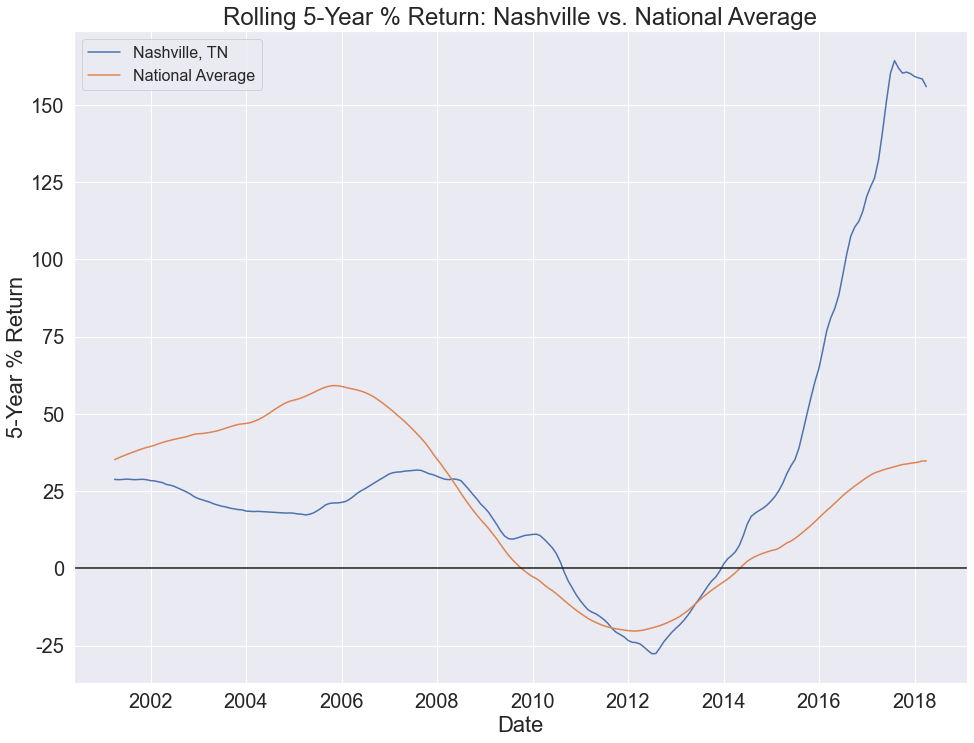

In [51]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)

#plt.figure()
fig, ax = plt.subplots(figsize=(16,12))

# Set the title and labels
ax.plot(lw_dvar[['5 year return','mar']])
ax.set_title('Rolling 5-Year % Return: Nashville vs. National Average', fontsize=24)
ax.set_xlabel('Date', fontsize=22)
ax.set_ylabel('5-Year % Return', fontsize=22)

legend_labels = ['Nashville, TN', 'National Average']
plt.legend(labels = legend_labels, loc = 'upper left', ncol=1, fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axhline(y=0, color='k', linestyle='-')

#plt.legend(loc="upper left", ncol=2)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show();

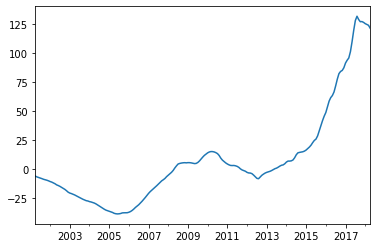

In [40]:
lw_dvar['5 year minus mar'].plot();

In [41]:
lw_down = lw_dvar.loc[lw_dvar['5 year minus mar'] < 0]

In [42]:
lw_down['neg sq'] = lw_down['5 year minus mar']**2

<ipython-input-42-0c89c2b59d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_down['neg sq'] = lw_down['5 year minus mar']**2


In [43]:
lw_down.head(60)

,home price,diff,home price shifted,pct,5 year shift,5 year return,mar,5 year minus mar,neg sq
2001-04-01,78300.0,300.0,78000.0,0.003846,60800.0,28.782895,35.180540,-6.397645,40.929863
2001-05-01,78500.0,200.0,78300.0,0.002554,61000.0,28.688525,35.760117,-7.071592,50.007418
2001-06-01,78800.0,300.0,78500.0,0.003822,61200.0,28.758170,36.308179,-7.550009,57.002635
2001-07-01,79000.0,200.0,78800.0,0.002538,61300.0,28.874388,36.831948,-7.957560,63.322761
2001-08-01,79200.0,200.0,79000.0,0.002532,61500.0,28.780488,37.328660,-8.548172,73.071246
2001-09-01,79400.0,200.0,79200.0,0.002525,61700.0,28.687196,37.806995,-9.119799,83.170737
2001-10-01,79700.0,300.0,79400.0,0.003778,61900.0,28.756058,38.272215,-9.516157,90.557248
2001-11-01,80000.0,300.0,79700.0,0.003764,62100.0,28.824477,38.732499,-9.908023,98.168915
2001-12-01,80300.0,300.0,80000.0,0.003750,62400.0,28.685897,39.111278,-10.425381,108.688560
2002-01-01,80500.0,200.0,80300.0,0.002491,62700.0,28.389155,39.446022,-11.056868,122.254325


In [44]:
lw_down.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2001-04-01 to 2013-05-01
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   home price          106 non-null    float64
 1   diff                106 non-null    float64
 2   home price shifted  106 non-null    float64
 3   pct                 106 non-null    float64
 4   5 year shift        106 non-null    float64
 5   5 year return       106 non-null    float64
 6   mar                 106 non-null    float64
 7   5 year minus mar    106 non-null    float64
 8   neg sq              106 non-null    float64
dtypes: float64(9)
memory usage: 8.3 KB


In [45]:
import numpy as np

np.sqrt(lw_down['neg sq'].sum()/lw_dvar['mar'].count())

16.457042623270837

In [67]:
lw_var = lake_worth['5 year return'].dropna()

In [68]:
lw_var.std()

85.07622645166362

In [70]:
lw_var.mean()

54.0368829557541

In [91]:
lw_var.describe()

count    206.000000
mean      53.871655
std       84.901596
min      -71.832123
25%      -33.036036
50%       57.167779
75%      124.909945
max      192.718999
Name: 5 year return, dtype: float64

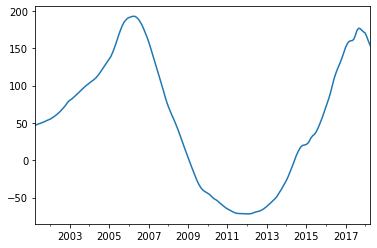

In [69]:
lw_var.plot();

In [30]:
lake_worth = lake_worth.dropna()

In [31]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-05-01,59900.0,100.0,59800.0,0.001672
1996-06-01,60000.0,100.0,59900.0,0.001669
1996-07-01,60200.0,200.0,60000.0,0.003333
1996-08-01,60400.0,200.0,60200.0,0.003322
1996-09-01,60700.0,300.0,60400.0,0.004967


In [33]:
lake_worth_pct = lake_worth.drop(['home price','diff','home price shifted'],axis=1)

In [34]:
lake_worth_pct.head()

,pct
1996-05-01,0.001672
1996-06-01,0.001669
1996-07-01,0.003333
1996-08-01,0.003322
1996-09-01,0.004967


In [45]:
lake_worth_pct = lake_worth_pct['2013-04':]

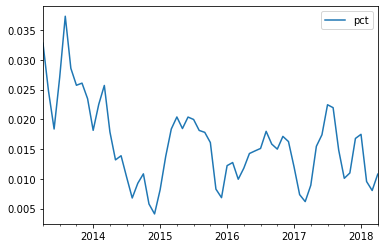

In [46]:
lake_worth_pct.plot();

In [36]:
from statsmodels.tsa.stattools import adfuller

In [47]:
adfuller(lake_worth_pct)

(-3.6685402773178515,
 0.004578065501380513,
 6,
 54,
 {'1%': -3.55770911573439,
  '5%': -2.9167703434435808,
  '10%': -2.59622219478738},
 -442.20977364927535)

In [48]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [59]:
cutoff = '2017-05'
train = lake_worth_pct[:cutoff]
test = lake_worth_pct[cutoff:]

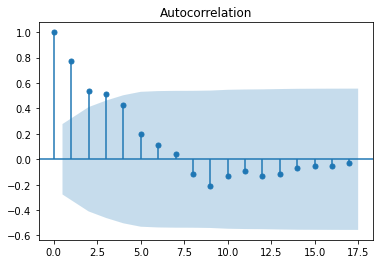

In [60]:
#Plot_acf is used to identify the q parameter
plot_acf(train);

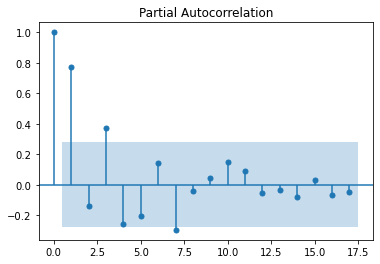

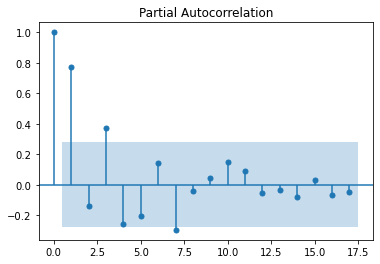

In [61]:
plot_pacf(train,method='ywm')

In [64]:
ar_1 = ARIMA(train, order=(1, 0, 1)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
train_pred = ar_1.predict()

/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [67]:
from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(train, train_pred))

0.0040740516947202175

In [65]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    pct   No. Observations:                   50
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 210.242
Date:                Tue, 28 Mar 2023   AIC                           -412.484
Time:                        00:56:59   BIC                           -404.836
Sample:                    04-01-2013   HQIC                          -409.571
                         - 05-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0173      0.003      6.403      0.000       0.012       0.023
ar.L1          0.6863      0.102      6.734      0.000       0.487       0.886
ma.L1          0.6950      0.120      5.791      0.000       0.460       0.930
sigma2      1.247e-05   2.42e-06      5.161      0.000    7.74e-06    1.72e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 2.80
Prob(Q):                              0.43   Prob(JB):                         0.25
Heteroskedasticity (H):               0.20   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
y_pred = ar_1.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ar_1.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

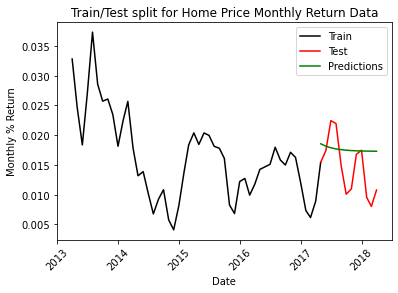

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train, color = "black",label='Train')
plt.plot(test, color = "red",label='Test')
plt.ylabel('Monthly % Return')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Home Price Monthly Return Data")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend();